In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

plt.style.use('bmh')
sns.set_style('whitegrid') 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
!pip install openpyxl 

In [3]:
bank_data_set = pd.read_excel(r"C:\Data Science Assignments\Basics Statistis 1\Logistic Regression\bank set.xlsx")
df = bank_data_set.copy()

In [4]:
df = bank_data_set.copy()

In [5]:
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
# dplitting columns to a numeric and catagorical type

categorical_columns = [x for x in df.columns if df[x].dtype == np.dtype('object')]
numerical_columns   = [x for x in df.columns if x not in(categorical_columns)]

In [12]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [13]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
def get_uniqes(df, col):
    index_list  = pd.DataFrame(df[col].value_counts().index, columns = [col])
    values_list = pd.DataFrame(df[col].value_counts().values, columns = ['counts'])
    unique_data = pd.concat([index_list, values_list], axis = 1)
    unique_data['percentage'] = round(unique_data['counts'] / sum(unique_data['counts']) * 100, 2)
    unique_data.sort_values(by='percentage', ascending = False)
    print('\n- {} Feature :\n'.format(col.upper()))
    for unit in range(unique_data.shape[0]):
        #print('    {} : %{}'.format( unique_data[col][unit], unique_data.percentage[unit]))
        print(f'{unique_data[col][unit]:10} : {unique_data.percentage[unit]}')

In [15]:
for categ in categorical_columns:
    get_uniqes(df, categ)


- JOB Feature :

blue-collar : 21.53
management : 20.92
technician : 16.8
admin.     : 11.44
services   : 9.19
retired    : 5.01
self-employed : 3.49
entrepreneur : 3.29
unemployed : 2.88
housemaid  : 2.74
student    : 2.07
unknown    : 0.64

- MARITAL Feature :

married    : 60.19
single     : 28.29
divorced   : 11.52

- EDUCATION Feature :

secondary  : 51.32
tertiary   : 29.42
primary    : 15.15
unknown    : 4.11

- DEFAULT Feature :

no         : 98.2
yes        : 1.8

- HOUSING Feature :

yes        : 55.58
no         : 44.42

- LOAN Feature :

no         : 83.98
yes        : 16.02

- CONTACT Feature :

cellular   : 64.77
unknown    : 28.8
telephone  : 6.43

- MONTH Feature :

may        : 30.45
jul        : 15.25
aug        : 13.82
jun        : 11.81
nov        : 8.78
apr        : 6.49
feb        : 5.86
jan        : 3.1
oct        : 1.63
sep        : 1.28
mar        : 1.06
dec        : 0.47

- POUTCOME Feature :

unknown    : 81.75
failure    : 10.84
other      : 4.07
success   

In [16]:
df['y'] = df['y'].map({'yes' : 1, 'no': 0})
df['loan'] = df['loan'].map({'yes' : 1, 'no': 0})
df['housing'] = df['housing'].map({'yes' : 1, 'no': 0})
df['default'] = df['default'].map({'yes' : 1, 'no': 0})

In [17]:
#Numerical data distribution informations
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,0.02,1362.27,0.56,0.16,15.81,258.16,2.76,40.20,0.58,0.12
std,10.62,0.13,3044.77,0.50,0.37,8.32,257.53,3.10,100.13,2.30,0.32
min,18.00,0.00,-8019.00,0.00,0.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,33.00,0.00,72.00,0.00,0.00,8.00,103.00,1.00,-1.00,0.00,0.00
50%,39.00,0.00,448.00,1.00,0.00,16.00,180.00,2.00,-1.00,0.00,0.00
75%,48.00,0.00,1428.00,1.00,0.00,21.00,319.00,3.00,-1.00,0.00,0.00
max,95.00,1.00,102127.00,1.00,1.00,31.00,4918.00,63.00,871.00,275.00,1.00


In [18]:
df.describe(include=['O'])

,job,marital,education,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,may,unknown
freq,9732,27214,23202,29285,13766,36959


In [19]:
## dummies feature

In [20]:
df_dummies = [pd.get_dummies(df['job'], prefix = 'job', prefix_sep = ':'),
              pd.get_dummies(df['marital'], prefix = 'marital', prefix_sep = ':'),
              pd.get_dummies(df['education'], prefix = 'education', prefix_sep = ':'),
              pd.get_dummies(df['contact'], prefix = 'contact', prefix_sep = ':'),
              pd.get_dummies(df['month'], prefix = 'month', prefix_sep = ':'),
              pd.get_dummies(df['poutcome'], prefix = 'poutcome', prefix_sep = ':')]

In [21]:
df_dummies = pd.concat(df_dummies, axis = 1)
df = pd.concat([df, df_dummies], axis = 1)
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'job:admin.',
       'job:blue-collar', 'job:entrepreneur', 'job:housemaid',
       'job:management', 'job:retired', 'job:self-employed',
       'job:services', 'job:student', 'job:technician', 'job:unemployed',
       'job:unknown', 'marital:divorced', 'marital:married',
       'marital:single', 'education:primary', 'education:secondary',
       'education:tertiary', 'education:unknown', 'contact:cellular',
       'contact:telephone', 'contact:unknown', 'month:apr', 'month:aug',
       'month:dec', 'month:feb', 'month:jan', 'month:jul', 'month:jun',
       'month:mar', 'month:may', 'month:nov', 'month:oct', 'month:sep',
       'poutcome:failure', 'poutcome:other', 'poutcome:success',
       'poutcome:unknown'], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split
train_test_split(df.drop('y', axis = 1), df['y'])

[       age          job  marital  education  default  balance  housing  loan  \
 30253   33   management   single   tertiary        0     7114        1     0   
 35962   28  blue-collar   single    primary        0       16        1     0   
 41172   29   management   single   tertiary        0     2531        0     0   
 3238    43  blue-collar  married    primary        0     1620        1     0   
 15713   39   management  married   tertiary        0     1423        1     0   
 ...    ...          ...      ...        ...      ...      ...      ...   ...   
 20045   46    housemaid  married    primary        0      269        0     0   
 7417    58  blue-collar  married    primary        0     5788        0     0   
 6507    31     services  married  secondary        0     -538        0     1   
 38082   37     services  married  secondary        0     4954        1     0   
 32659   33   management   single  secondary        0     1558        1     0   
 
          contact  day  ..

In [23]:
df_inputs_train, df_inputs_test, df_targets_train, df_targets_test = train_test_split(df.drop('y', axis = 1), df['y'], test_size = 0.2, random_state=42) 
df_inputs_train.shape

(36168, 54)

In [24]:
df_inputs_test.shape

(9043, 54)

In [25]:
df_targets_train.shape

(36168,)

In [26]:
df_targets_test.shape

(9043,)

### Data Preparation

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job:admin.', 'job:blue-collar',
       'job:entrepreneur', 'job:housemaid', 'job:management', 'job:retired',
       'job:self-employed', 'job:services', 'job:student', 'job:technician',
       'job:unemployed', 'job:unknown', 'marital:divorced', 'marital:married',
       'marital:single', 'education:primary', 'education:secondary',
       'education:tertiary', 'education:unknown', 'contact:cellular',
       'contact:telephone', 'contact:unknown', 'month:apr', 'month:aug',
       'month:dec', 'month:feb', 'month:jan', 'month:jul', 'month:jun',
       'month:mar', 'month:may', 'month:nov', 'month:oct', 'month:sep',
       'poutcome:failure', 'poutcome:other', 'poutcome:success',
       'poutcome:unknown'],
      dtype='object')

In [29]:
df_inputs_train = df[numerical_columns]  
df_targets_train = df['y'] 

In [30]:
df_inputs_prepr = df_inputs_train.copy()  
df_targets_prepr = df_targets_train.copy()

In [31]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [32]:
df_temp = woe_discrete(df, 'marital', df_targets_prepr)
df_temp

,marital,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,married,27214,0.10,0.60,2755.00,24459.00,0.52,0.61,-0.16,NaN,NaN,0.04
1,divorced,5207,0.12,0.12,622.00,4585.00,0.12,0.11,0.02,0.02,0.19,0.04
2,single,12790,0.15,0.28,1912.00,10878.00,0.36,0.27,0.28,0.03,0.26,0.04


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

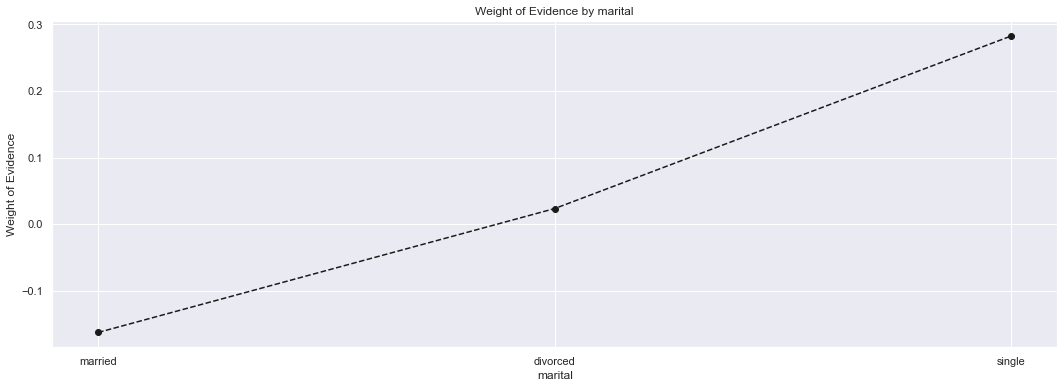

In [35]:
plot_by_woe(df_temp)

In [36]:
df_temp = woe_discrete(df, 'job', df_targets_prepr)
df_temp

,job,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,blue-collar,9732,0.07,0.22,708.00,9024.00,0.13,0.23,-0.52,NaN,NaN,0.16
1,entrepreneur,1487,0.08,0.03,123.00,1364.00,0.02,0.03,-0.38,0.01,0.14,0.16
2,housemaid,1240,0.09,0.03,109.00,1131.00,0.02,0.03,-0.32,0.01,0.07,0.16
3,services,4154,0.09,0.09,369.00,3785.00,0.07,0.09,-0.31,0.00,0.01,0.16
4,technician,7597,0.11,0.17,840.00,6757.00,0.16,0.17,-0.06,0.02,0.24,0.16
5,unknown,288,0.12,0.01,34.00,254.00,0.01,0.01,0.01,0.01,0.07,0.16
6,self-employed,1579,0.12,0.03,187.00,1392.00,0.04,0.03,0.01,0.00,0.00,0.16
7,admin.,5171,0.12,0.11,631.00,4540.00,0.12,0.11,0.05,0.00,0.03,0.16
8,management,9458,0.14,0.21,1301.00,8157.00,0.25,0.20,0.19,0.02,0.14,0.16
9,unemployed,1303,0.16,0.03,202.00,1101.00,0.04,0.03,0.33,0.02,0.14,0.16


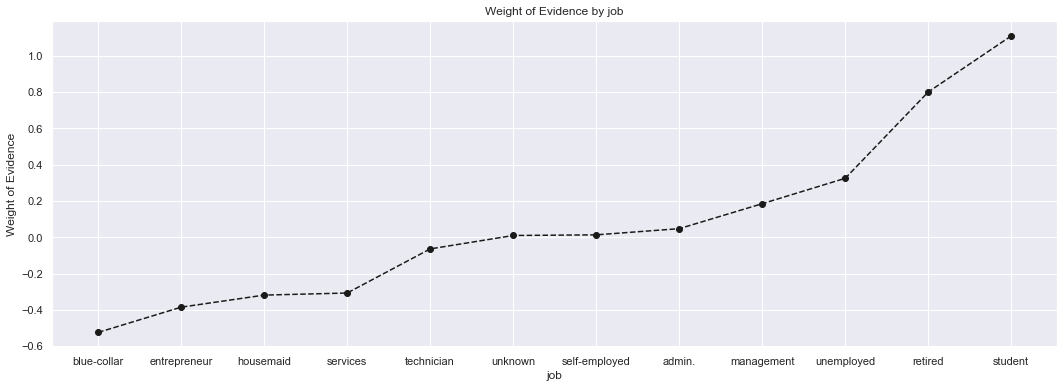

In [37]:
plot_by_woe(df_temp)

In [40]:

print(df_inputs_prepr.columns)


specific_column = 'job:entrepreneur'
if specific_column in df_inputs_prepr.columns:
    column_data = df_inputs_prepr[specific_column]
else:
    print(f"Column '{specific_column}' not found in the DataFrame.")


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Column 'job:entrepreneur' not found in the DataFrame.


In [41]:
df_temp = woe_discrete(df, 'education', df_targets_prepr)
df_temp

,education,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,primary,6851,0.09,0.15,591.00,6260.00,0.11,0.16,-0.34,NaN,NaN,0.05
1,secondary,23202,0.11,0.51,2450.00,20752.00,0.46,0.52,-0.12,0.02,0.22,0.05
2,unknown,1857,0.14,0.04,252.00,1605.00,0.05,0.04,0.17,0.03,0.29,0.05
3,tertiary,13301,0.15,0.29,1996.00,11305.00,0.38,0.28,0.29,0.01,0.12,0.05


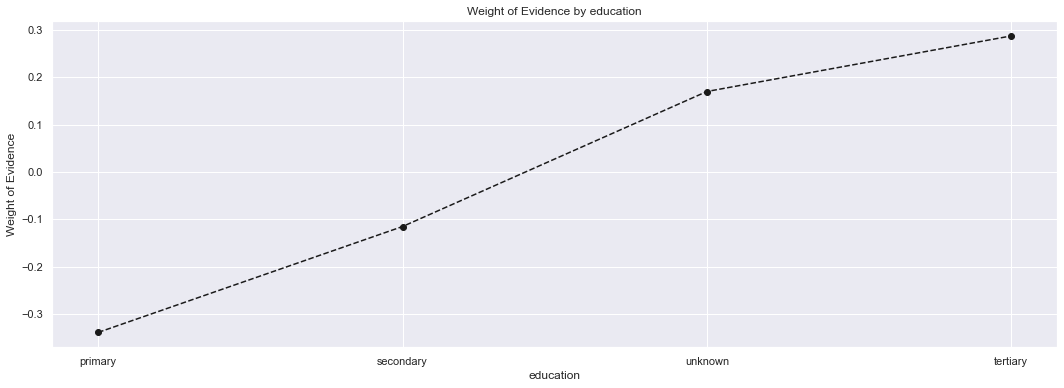

In [42]:
plot_by_woe(df_temp)

In [43]:
df_temp = woe_discrete(df, 'month', df_targets_prepr)
df_temp

,month,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,may,13766,0.07,0.30,925.00,12841.00,0.17,0.32,-0.61,NaN,NaN,0.44
1,jul,6895,0.09,0.15,627.00,6268.00,0.12,0.16,-0.28,0.02,0.33,0.44
2,jan,1403,0.10,0.03,142.00,1261.00,0.03,0.03,-0.16,0.01,0.12,0.44
3,nov,3970,0.10,0.09,403.00,3567.00,0.08,0.09,-0.16,0.00,0.00,0.44
4,jun,5341,0.10,0.12,546.00,4795.00,0.10,0.12,-0.15,0.00,0.01,0.44
5,aug,6247,0.11,0.14,688.00,5559.00,0.13,0.14,-0.07,0.01,0.08,0.44
6,feb,2649,0.17,0.06,441.00,2208.00,0.08,0.06,0.41,0.06,0.48,0.44
7,apr,2932,0.20,0.06,577.00,2355.00,0.11,0.06,0.61,0.03,0.20,0.44
8,oct,738,0.44,0.02,323.00,415.00,0.06,0.01,1.77,0.24,1.16,0.44
9,sep,579,0.46,0.01,269.00,310.00,0.05,0.01,1.88,0.03,0.11,0.44


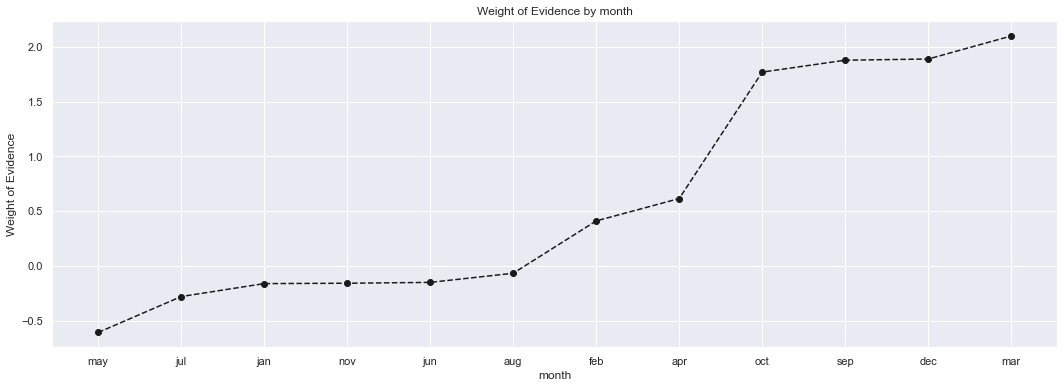

In [44]:
plot_by_woe(df_temp)

In [46]:

print(df_inputs_prepr.columns)

specific_column = 'month:jul'
if specific_column in df_inputs_prepr.columns:
    column_data = df_inputs_prepr[specific_column]
else:
    print(f"Column '{specific_column}' not found in the DataFrame.")


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Column 'month:jul' not found in the DataFrame.


In [47]:
df_temp = woe_discrete(df, 'poutcome', df_targets_prepr)
df_temp

,poutcome,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,unknown,36959,0.09,0.82,3386.00,33573.00,0.64,0.84,-0.27,NaN,NaN,0.51
1,failure,4901,0.13,0.11,618.00,4283.00,0.12,0.11,0.09,0.03,0.36,0.51
2,other,1840,0.17,0.04,307.00,1533.00,0.06,0.04,0.41,0.04,0.33,0.51
3,success,1511,0.65,0.03,978.00,533.00,0.18,0.01,2.63,0.48,2.22,0.51


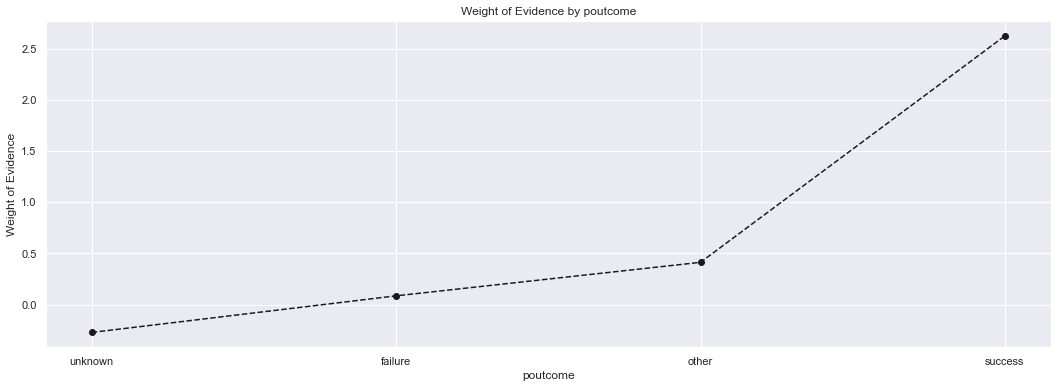

In [48]:
plot_by_woe(df_temp)

####  Preprocessing Continuous ariables: Creating Dummy Variables.

In [49]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


In [50]:
df_inputs_prepr['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [51]:
df_temp = woe_ordered_continuous(df, 'age', df_targets_prepr)
df_temp

C:\Users\Kajal\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,18,12,0.58,0.00,7.00,5.00,0.00,0.00,2.36,NaN,NaN,inf
1,19,35,0.31,0.00,11.00,24.00,0.00,0.00,1.24,0.27,1.12,inf
2,20,50,0.30,0.00,15.00,35.00,0.00,0.00,1.17,0.01,0.07,inf
3,21,79,0.28,0.00,22.00,57.00,0.00,0.00,1.07,0.02,0.10,inf
4,22,129,0.31,0.00,40.00,89.00,0.01,0.00,1.22,0.03,0.15,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
72,90,2,1.00,0.00,2.00,0.00,0.00,0.00,inf,1.00,inf,inf
73,92,2,1.00,0.00,2.00,0.00,0.00,0.00,inf,0.00,NaN,inf
74,93,2,1.00,0.00,2.00,0.00,0.00,0.00,inf,0.00,NaN,inf
75,94,1,0.00,0.00,0.00,1.00,0.00,0.00,-inf,1.00,inf,inf


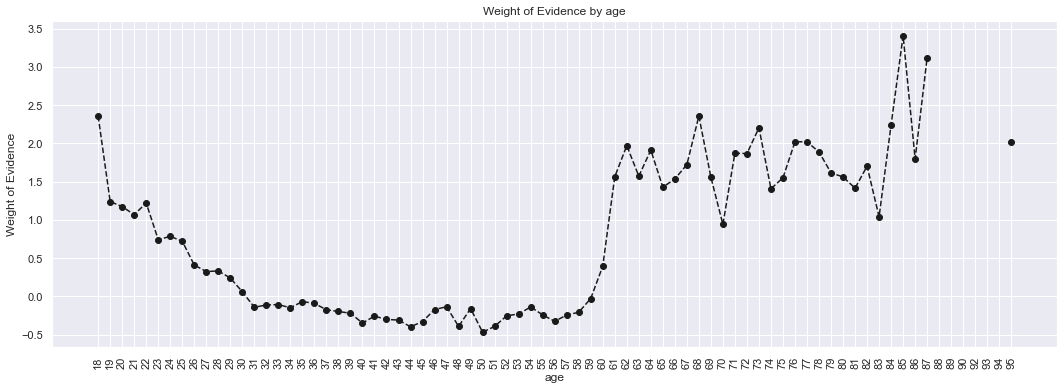

In [52]:
plot_by_woe(df_temp, 90)

In [53]:
df_inputs_prepr['age_factor'] = pd.cut(df_inputs_prepr['age'], 20)

In [54]:
df_inputs_prepr['age_factor']

0        (56.5, 60.35]
1        (41.1, 44.95]
2        (29.55, 33.4]
3        (44.95, 48.8]
4        (29.55, 33.4]
             ...      
45206    (48.8, 52.65]
45207    (68.05, 71.9]
45208    (71.9, 75.75]
45209    (56.5, 60.35]
45210    (33.4, 37.25]
Name: age_factor, Length: 45211, dtype: category
Categories (20, interval[float64, right]): [(17.923, 21.85] < (21.85, 25.7] < (25.7, 29.55] < (29.55, 33.4] ... (79.6, 83.45] < (83.45, 87.3] < (87.3, 91.15] < (91.15, 95.0]]

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job:admin.', 'job:blue-collar',
       'job:entrepreneur', 'job:housemaid', 'job:management', 'job:retired',
       'job:self-employed', 'job:services', 'job:student', 'job:technician',
       'job:unemployed', 'job:unknown', 'marital:divorced', 'marital:married',
       'marital:single', 'education:primary', 'education:secondary',
       'education:tertiary', 'education:unknown', 'contact:cellular',
       'contact:telephone', 'contact:unknown', 'month:apr', 'month:aug',
       'month:dec', 'month:feb', 'month:jan', 'month:jul', 'month:jun',
       'month:mar', 'month:may', 'month:nov', 'month:oct', 'month:sep',
       'poutcome:failure', 'poutcome:other', 'poutcome:success',
       'poutcome:unknown'],
      dtype='object')

In [56]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

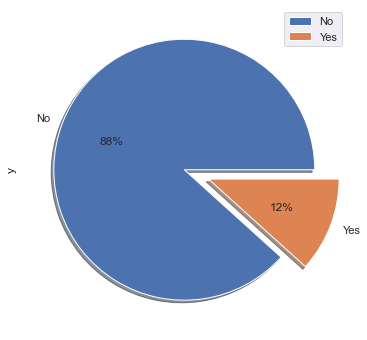

In [57]:
#Let's make a visualize about our target column
plt.figure(figsize=(9,6))
labels = ['No','Yes']
df['y'].value_counts().plot.pie(shadow=True,
                                labels=labels,
                                autopct='%0.f%%',
                                explode = [0.0,0.2])
plt.legend()
plt.show()

In [58]:
df['y']       = df.y.map({'yes':1, 'no':0})
df['default'] = df.default.map({'yes':1, 'no':0})
df['housing'] = df.housing.map({'yes':1, 'no':0})
df['loan']    = df.loan.map({'yes':1, 'no':0})

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month:jun,month:mar,month:may,month:nov,month:oct,month:sep,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
0,58,management,married,tertiary,NaN,2143,NaN,NaN,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,NaN,29,NaN,NaN,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,NaN,2,NaN,NaN,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,NaN,1506,NaN,NaN,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,NaN,1,NaN,NaN,unknown,5,...,0,0,1,0,0,0,0,0,0,1


<Figure size 9600x6400 with 0 Axes>

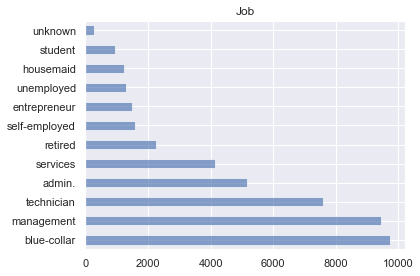

In [60]:
plt.figure(figsize=(6,4), dpi=1600)
fig,ax = plt.subplots()
df.job.value_counts().plot(kind='barh',alpha=.65)
plt.title('Job')
plt.tight_layout()
plt.show()

In [61]:
#let's take a look to what is the most common job among the yes said clients and what is the percent of this job to all jobs?
df[['job','y']].groupby(['job'], as_index=True).mean().sort_values(
    by='y',ascending=False).style.background_gradient(axis=None
                                        , low=0.75, high=1.0)

C:\Users\Kajal\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Kajal\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,y
job,
admin.,nan
blue-collar,nan
entrepreneur,nan
housemaid,nan
management,nan
retired,nan
self-employed,nan
services,nan
student,nan


In [62]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [63]:
df['job'] = df.job.map({'management' : 1, 'technician' : 2, 'entrepreneur' : 3, 'blue-collar' : 4,
       'unknown' : 5, 'retired' : 6, 'admin.' : 7, 'services' : 8, 'self-employed' : 9,
       'unemployed' : 10, 'housemaid' : 11, 'student': 12}).astype(int)

Text(0.5, 1.0, 'Marital')

<Figure size 9600x4800 with 0 Axes>

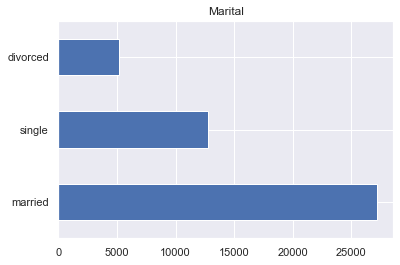

In [64]:
plt.figure(figsize=(6,3), dpi=1600)
fig,ax = plt.subplots()
df['marital'].value_counts().plot(kind='barh')
plt.title('Marital')

In [65]:
df[['marital', 'y']].groupby('marital', as_index=False).mean().sort_values(by='y', ascending=True).style.background_gradient(axis=None
                                                                                  , low=0.75, high=1.0)

C:\Users\Kajal\anaconda3\lib\site-packages\pandas\io\formats\style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Kajal\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,marital,y
0,divorced,nan
1,married,nan
2,single,nan


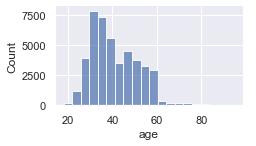

In [66]:
grid = sns.FacetGrid(df, height=2.2, aspect=1.6)
grid.map(sns.histplot, 'age', alpha=0.7, bins=20)
grid.add_legend()


In [67]:
df['marital'] = df.marital.map({'married': 0, 'single': 1, 'divorced': 2}).astype(int)

C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


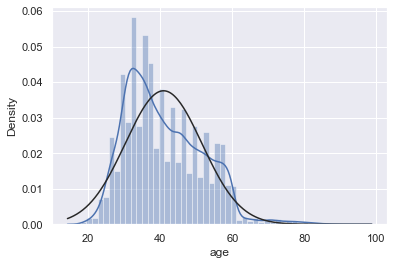

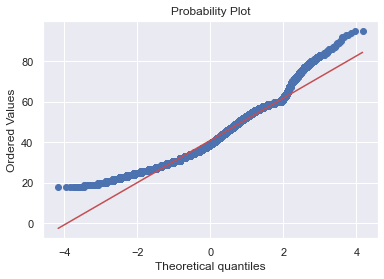

In [68]:
from scipy import stats
sns.distplot(df['age'],fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)

In [72]:
print(df['y'].unique())


[nan]


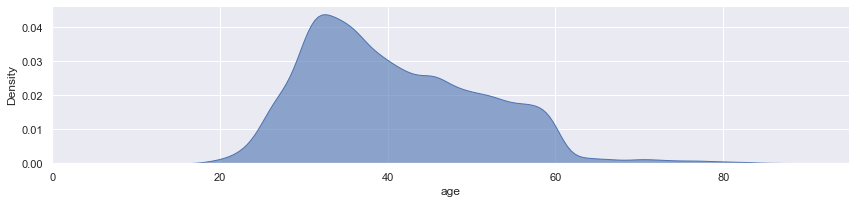

In [73]:
gde = sns.FacetGrid(df, aspect=4)
gde.map(sns.kdeplot, 'age', shade=True, alpha=.6)
gde.set(xlim=(0, df['age'].max()))
gde.add_legend()


In [74]:
df['age'].nlargest(10)

33699    95
41663    95
31233    94
44262    93
44420    93
41934    92
42727    92
31069    90
43194    90
41162    89
Name: age, dtype: int64

In [75]:
#The correlation before
df.corr().age.y

nan

In [76]:
df['Age_band'] = pd.cut(df['age'],4)
df['Age_band'].unique()

[(56.5, 75.75], (37.25, 56.5], (17.923, 37.25], (75.75, 95.0]]
Categories (4, interval[float64, right]): [(17.923, 37.25] < (37.25, 56.5] < (56.5, 75.75] < (75.75, 95.0]]

In [77]:
df[['Age_band','y']].groupby(['Age_band'], as_index=False).mean().sort_values(by='Age_band', ascending=True)

,Age_band,y
0,"(17.923, 37.25]",NaN
1,"(37.25, 56.5]",NaN
2,"(56.5, 75.75]",NaN
3,"(75.75, 95.0]",NaN


In [78]:
for col in [df]:
  col.loc[ col['age'] <= 17, 'age'] = 0
  col.loc[ (col['age'] > 17) & (col['age'] <= 60), 'age'] = 1
  col.loc[ (col['age'] > 60) & (col['age'] <= 80), 'age'] = 2
  col.loc[ (col['age'] > 80) , 'age'] = 3

In [79]:
df.corr().age.y #0.15166029355916677

nan

In [80]:
df.drop(['Age_band'], axis=1, inplace=True)

#### month feature

<AxesSubplot:xlabel='month', ylabel='count'>

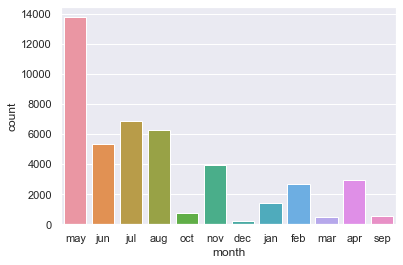

In [81]:
sns.countplot(x='month', data=df)

In [89]:
print(df['y'].unique())


[nan]


In [92]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

### Education Feature

In [96]:
df[['education','y']].groupby('education', as_index=True).mean().sort_values(by='y', ascending=False)

,y
education,
primary,NaN
secondary,NaN
tertiary,NaN
unknown,NaN


<AxesSubplot:xlabel='education', ylabel='count'>

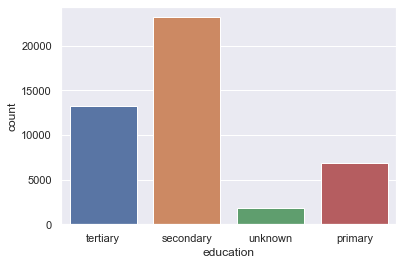

In [97]:
sns.countplot(data=df, x='education')

In [98]:
df['education'] = df.education.map({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4})

In [99]:
df[['contact','y']].groupby('contact', as_index=True).mean().sort_values(by='y', ascending=False)

,y
contact,
cellular,NaN
telephone,NaN
unknown,NaN


<AxesSubplot:xlabel='contact', ylabel='count'>

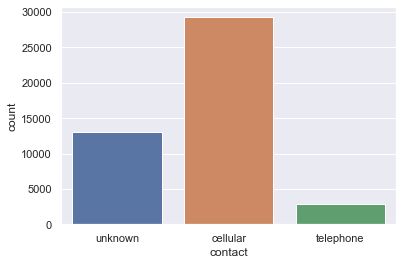

In [100]:
sns.countplot(data=df, x='contact')

In [101]:
df['contact'] = df.contact.map({'telephone': 1, 'cellular': 2, 'unknown': 3})

In [102]:
df[['poutcome','y']].groupby('poutcome', as_index=True).mean().sort_values(by='y', ascending=False)

,y
poutcome,
failure,NaN
other,NaN
success,NaN
unknown,NaN


<AxesSubplot:xlabel='poutcome', ylabel='count'>

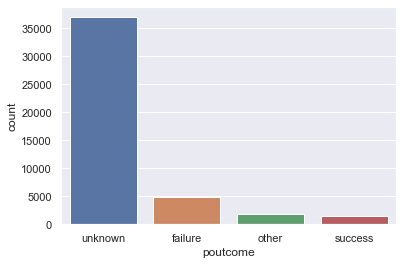

In [103]:
sns.countplot(data=df, x='poutcome')

In [104]:
df.drop(['poutcome'], axis=1, inplace=True)

###Balance Feature

In [105]:
df['balance'].describe()

count    45211.00
mean      1362.27
std       3044.77
min      -8019.00
25%         72.00
50%        448.00
75%       1428.00
max     102127.00
Name: balance, dtype: float64

In [107]:
#the correlation before
df.corr().balance.y

nan

In [108]:
df['balance'].nlargest(10)

39989    102127
26227     98417
42558     81204
43393     81204
41693     71188
19785     66721
21192     66653
19420     64343
41374     59649
12926     58932
Name: balance, dtype: int64

In [109]:
df['Balance_band'] = pd.cut(df['balance'],4)
df[['Balance_band', 'y']].groupby('Balance_band', as_index=True).mean().sort_values(by='Balance_band', ascending=False)

,y
Balance_band,
"(74590.5, 102127.0]",NaN
"(47054.0, 74590.5]",NaN
"(19517.5, 47054.0]",NaN
"(-8129.146, 19517.5]",NaN


In [110]:
for col in[df]:
  col.loc[ col['balance'] <= 0, 'balance'] = 0
  col.loc[ (col['balance'] > 0) & (col['balance'] <= 74590.5), 'balance'] = 1
  col.loc[ (col['balance'] > 74590.5), 'balance'] = 2

In [111]:
df.corr().balance.y

nan

In [112]:
df.drop('Balance_band', axis=1, inplace=True)

#### Duration Feature¶

C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


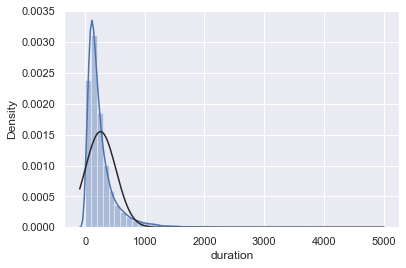

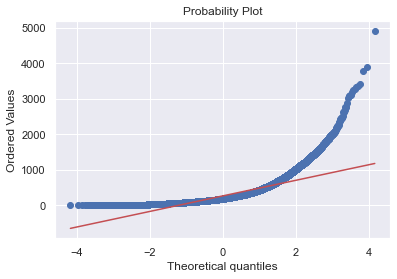

In [113]:
from scipy import stats
sns.distplot(df['duration'],fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['duration'], plot=plt)

In [114]:
df['duration'].nlargest(10)

24148    4918
9947     3881
44602    3785
19639    3422
2386     3366
21113    3322
24095    3284
24044    3253
12347    3183
30747    3102
Name: duration, dtype: int64

In [115]:
df.corr().duration.y

nan

In [116]:
df['dband'] = pd.cut(df['duration'],4)

In [117]:
df[['dband','y']].groupby('dband', as_index=True).mean().sort_values(by='y', ascending=False)

,y
dband,
"(-4.918, 1229.5]",NaN
"(1229.5, 2459.0]",NaN
"(2459.0, 3688.5]",NaN
"(3688.5, 4918.0]",NaN


In [118]:
df = df.drop('dband', axis=1)

In [120]:
print(df['y'].unique())


[nan]


In [121]:
print("Number of 'Yes' rows:", len(df[df.y == 1]))
print("Number of 'No' rows:", len(df[df.y == 0]))


Number of 'Yes' rows: 0
Number of 'No' rows: 0


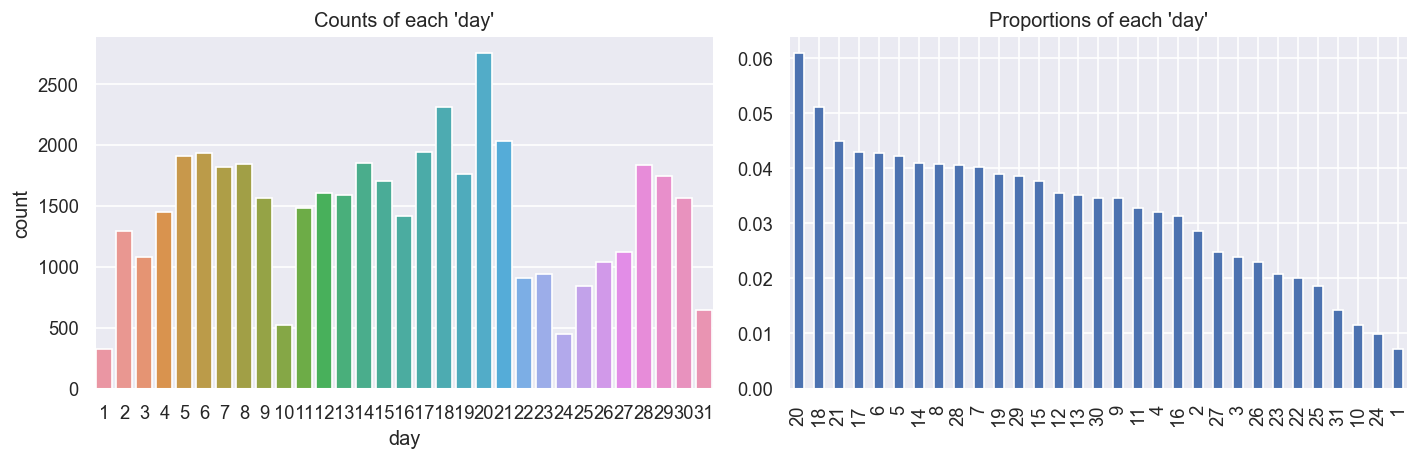

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=120)

# Plot the counts of 'day'
sns.countplot(data=df, x='day', ax=ax1)
ax1.set_title("Counts of each 'day'")

# Plot the proportions of 'day'
(df['day'].value_counts() / len(df)).plot(kind='bar', ax=ax2)
ax2.set_title("Proportions of each 'day'")

plt.tight_layout()
plt.show()


In [125]:
df.corr().campaign.y

nan

In [126]:
df['com_band'] = pd.cut(df['campaign'],2)

In [127]:
df[['com_band','y']].groupby('com_band', as_index=True).mean().sort_values(by='y', ascending=False)

,y
com_band,
"(0.938, 32.0]",NaN
"(32.0, 63.0]",NaN


In [128]:
df.drop('com_band', axis=1, inplace=True)

In [131]:
df.corr().pdays.y

nan

In [132]:
df['pdays_band'] = pd.cut(df['pdays'],2)

In [133]:
df[['pdays_band','y']].groupby('pdays_band', as_index=True).mean().sort_values(by='y', ascending=False)

,y
pdays_band,
"(-1.872, 435.0]",NaN
"(435.0, 871.0]",NaN


In [134]:
for col in [df]:
  col.loc[ col['pdays'] < -1.872, 'pdays'] = 0
  col.loc[ (col['pdays'] > -1) & (col['pdays'] <= 435.0), 'pdays'] = 1
  col.loc[ (col['pdays'] > 435.0) & (col['pdays'] <= 653.0), 'pdays'] = 2
  col.loc[ (col['pdays'] > 653.0) , 'pdays'] = 3

In [135]:
df.corr().pdays.y #0.170344681888624

nan

In [136]:
df.drop('pdays_band', axis=1, inplace=True)

In [138]:
df.corr().previous.y

nan

In [139]:
df['prev_band'] = pd.cut(df['previous'],2)

In [140]:
df[['prev_band','y']].groupby('prev_band', as_index=True).mean().sort_values(by='y', ascending=False)

,y
prev_band,
"(-0.275, 137.5]",NaN
"(137.5, 275.0]",NaN


In [141]:
for col in [df]:
  col.loc[ (col['previous'] < 1), 'previous'] = 0
  col.loc[ (col['previous'] > 1   ) & (col['previous'] <= 137.5), 'previous'] = 1
  col.loc[ (col['previous'] > 137.5) , 'previous'] = 2

In [142]:
df.corr().previous.y

nan

In [143]:
df.drop('prev_band', axis=1, inplace=True)

In [144]:
bank_data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [145]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month:jun,month:mar,month:may,month:nov,month:oct,month:sep,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
0,1,1,0,3,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
1,1,2,1,2,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
2,1,3,0,2,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
3,1,4,0,4,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
4,1,5,1,4,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1


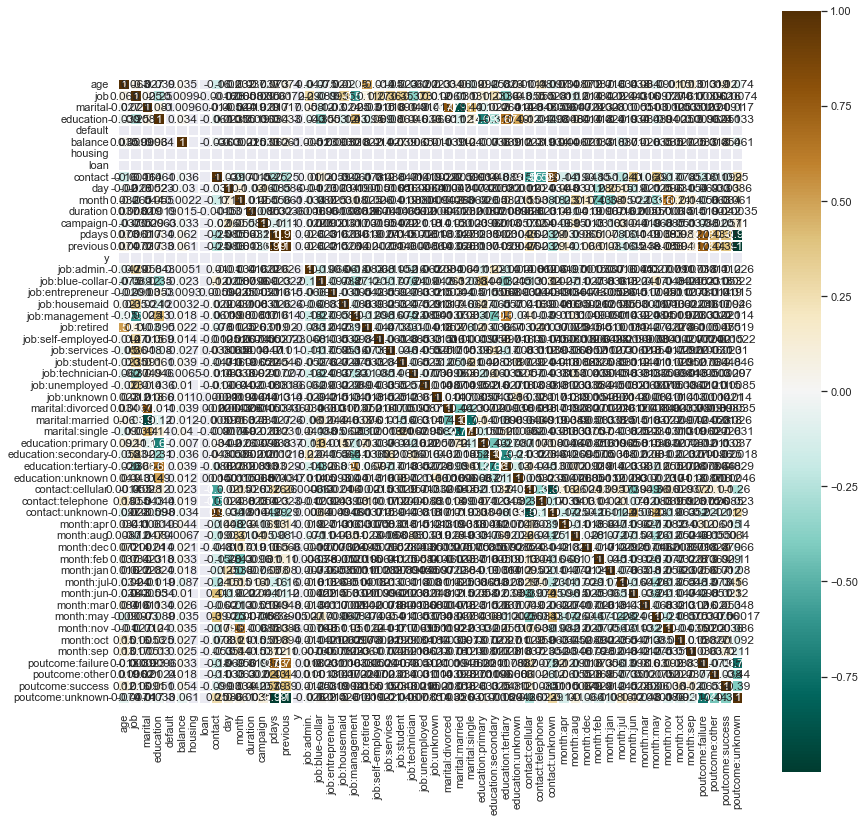

In [147]:
cormat = df.corr()

# Create a figure and plot the heatmap
plt.subplots(figsize=(14, 14))
sns.heatmap(cormat, annot=True, square=True, cmap=plt.cm.get_cmap('BrBG').reversed(), linewidths=0.35)

plt.show()

In [148]:
df0 = df.copy()
df0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month:jun,month:mar,month:may,month:nov,month:oct,month:sep,poutcome:failure,poutcome:other,poutcome:success,poutcome:unknown
0,1,1,0,3,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
1,1,2,1,2,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
2,1,3,0,2,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
3,1,4,0,4,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1
4,1,5,1,4,NaN,1,NaN,NaN,3,5,...,0,0,1,0,0,0,0,0,0,1


In [149]:
train_data = df0.iloc[:round(df.shape[0]*.85,), :]
test_data = df0.iloc[train_data.shape[0]:, :]

In [150]:
print(' Train datat shape: {} '.format(train_data.shape))
print(' Test datat shape: {} '.format(test_data.shape))

 Train datat shape: (38429, 54) 
 Test datat shape: (6782, 54) 


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [152]:
X = train_data.iloc[:, :15]
y = train_data.iloc[:, -1]

Xt = test_data.iloc[:, :15]
yt = test_data.iloc[:, -1]

In [153]:
transformer = StandardScaler()
X = transformer.fit_transform(X)

Xt = transformer.fit_transform(Xt)
############################

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: inv

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=98)

In [155]:
X_train[:5]

array([[-0.07606318, -0.14703518, -0.71968637, -1.61121377,         nan,
         0.46052159,         nan,         nan, -2.27155814,  0.12156706,
        -0.87381692, -0.83005759, -0.57936525, -0.37861052, -0.37856564],
       [-0.07606318, -0.81057989,  2.14348746,  1.08066867,         nan,
         0.46052159,         nan,         nan, -0.48903532,  0.3622647 ,
         2.11778798, -0.60678892, -0.27442323, -0.37861052, -0.37856564],
       [-0.07606318,  0.84828188, -0.71968637, -1.61121377,         nan,
        -2.17066845,         nan,         nan, -0.48903532,  1.4454041 ,
         0.40829947,  1.04077988,  0.64040286, -0.37861052, -0.37856564],
       [-0.07606318,  2.17537131, -0.71968637, -1.61121377,         nan,
         0.46052159,         nan,         nan, -0.48903532, -0.11913058,
        -0.87381692, -0.60293946, -0.57936525, -0.37861052, -0.37856564],
       [-0.07606318,  0.84828188,  0.71190054, -0.26527255,         nan,
        -2.17066845,         nan,         nan, 

In [156]:
X_test[:5]
Xt[:5]

array([[-0.38976288,  0.85803992,  0.64993748, -0.50458129,         nan,
         0.29532816,         nan,         nan,  0.1725097 ,  0.02801631,
        -0.63546636, -0.69919636, -0.6482061 ,  0.90255629,  0.98594366],
       [-0.38976288, -0.28455319, -0.87159376, -0.50458129,         nan,
         0.29532816,         nan,         nan,  0.1725097 ,  0.02801631,
        -0.63546636, -0.85911255,  0.65764085,  0.90255629,  0.98594366],
       [-0.38976288,  1.1436882 , -0.87159376,  0.81668138,         nan,
         0.29532816,         nan,         nan,  0.1725097 ,  0.02801631,
        -0.63546636, -0.22764862,  2.61641128,  0.90255629,  0.98594366],
       [-0.38976288, -1.14149803,  0.64993748,  0.81668138,         nan,
         0.29532816,         nan,         nan,  0.1725097 ,  0.02801631,
        -0.63546636, -0.47367352,  0.65764085, -0.99370665, -1.01425673],
       [-0.38976288, -0.28455319, -0.87159376, -1.82584397,         nan,
         0.29532816,         nan,         nan, 